In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/accident.csv')
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              196 non-null    int64  
 1   Gender           196 non-null    object 
 2   Speed_of_Impact  196 non-null    float64
 3   Helmet_Used      196 non-null    object 
 4   Seatbelt_Used    196 non-null    object 
 5   Survived         196 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.7+ KB


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


Survived
1    100
0     96
Name: count, dtype: int64


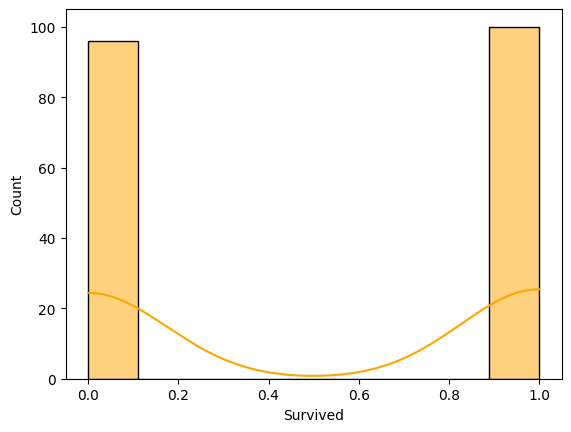

In [ ]:
print(df['Survived'].value_counts())
sns.histplot(df['Survived'], kde=True, color='orange')
plt.show()

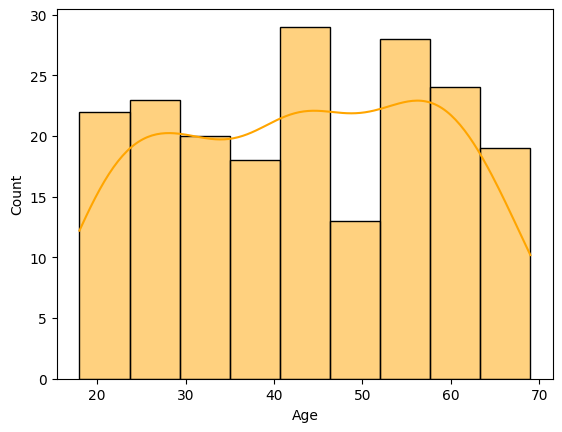

In [ ]:
sns.histplot(df['Age'], kde=True, color='orange')
plt.show()

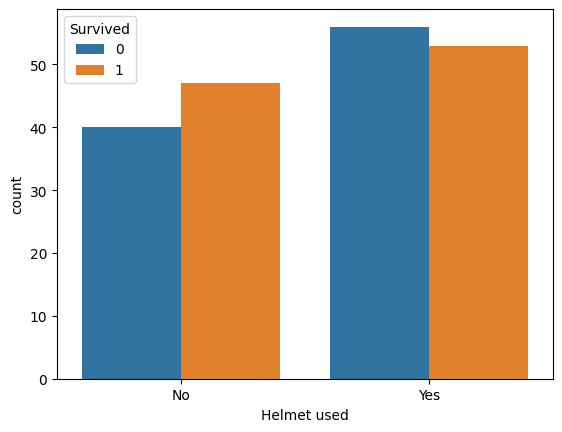

In [ ]:
sns.countplot(x='Helmet_Used', hue='Survived', data=df)
plt.xlabel('Helmet used')
plt.show()

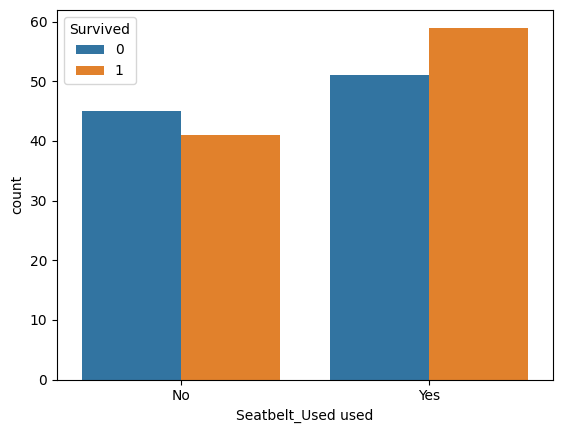

In [ ]:
sns.countplot(x='Seatbelt_Used', hue='Survived', data=df)
plt.xlabel('Seatbelt_Used used')
plt.show()

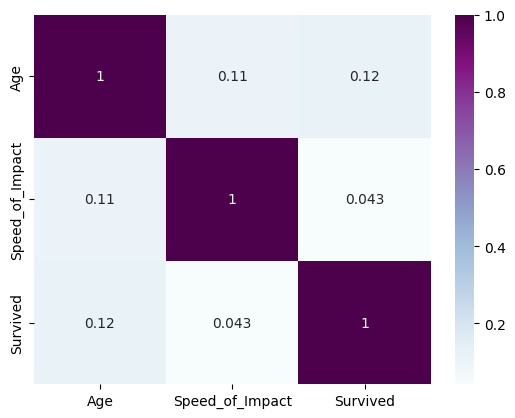

In [ ]:
calculated_corr = df[['Age', 'Speed_of_Impact', 'Survived']].corr()
sns.heatmap(calculated_corr, annot=True, cmap='BuPu')
plt.show()

In [ ]:
df['Speed_of_Impact'] = df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
df['Gender'] = ohe.fit_transform(df[['Gender']])

In [ ]:
df['Helmet_Used'] = ohe.fit_transform(df[['Helmet_Used']])
df['Seatbelt_Used'] = ohe.fit_transform(df[['Seatbelt_Used']])
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0.0,27.0,0.0,0.0,1
1,69,0.0,46.0,0.0,1.0,1
2,46,1.0,46.0,1.0,1.0,0
3,32,1.0,117.0,0.0,1.0,0
4,60,0.0,40.0,1.0,1.0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()

df[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
    ]] = mc.fit_transform(
    df[['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used']]
)

# Modeling

In [ ]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,
                                                random_state=32)

In [ ]:
xtrain.shape

(156, 5)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=5))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from re import VERBOSE
model.fit(xtrain, ytrain, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.5165 - loss: 0.6951 - val_accuracy: 0.3750 - val_loss: 0.7091
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5567 - loss: 0.6904 - val_accuracy: 0.4062 - val_loss: 0.7042
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6003 - loss: 0.6871 - val_accuracy: 0.4375 - val_loss: 0.7013
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5869 - loss: 0.6850 - val_accuracy: 0.4375 - val_loss: 0.6985
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5423 - loss: 0.6853 - val_accuracy: 0.4688 - val_loss: 0.6958
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5944 - loss: 0.6807 - val_accuracy: 0.4688 - val_loss: 0.6952
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6069 - loss: 0.6780 - val_accuracy: 0.4688 - val_loss: 0.6947
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5769 - loss: 0.6795 - val_accuracy: 0.4688 - val_loss

In [ ]:
ypred = model.predict(xtest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


In [ ]:
ypred = ypred.argmax(axis=-1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.55

# Got 0.55 Accuracy with ANN